# Dan's Machine Learning - Plot examples
Incorporating several works for plotting and machine learning techniques.
First Example, wine offers

In [6]:
# == load libraries ==
import logging
import numpy as np                  # math/science
import pandas as pd                 # data
import csv                          # for csv sniffer
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from matplotlib.sankey import Sankey
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score        # for kmeans analysis


# custom
import util                         # base util class
import util_plot                    # plotting functions
import util_data                    # data sourcing and pre-processing

In [7]:
logger = logging.getLogger(__name__)# set logging
util_data.setDF(f='{:,.0f}')        # set DF format for float values

In [8]:
DF = util_data.ProjectData('wine').DF     # get datasets
offers     = DF['offers']                     # assign offers dataframe
trans      = DF['transactions']               # assign transactions dataframe
features   = offers.columns                   # used to determine how many clusters to test
offer_log  = util_data.pd.crosstab(trans.Cust_ln, trans.Offer).apply(lambda x: x, axis=1)
offers.insert(0, 'counts', offer_log.sum().values)    # prepend column
purchases  = util_data.pd.DataFrame(offer_log.sum(axis=1), columns =['purchases']) # new dataframe for accumulating kmeans data
purchases.reset_index(inplace=True)                # align to zero-based index

In [9]:
offers

,counts,Offer,Campaign,Varietal,Qty_min_kg,Discount,Origin,PastPeak
0,10,1,January,Malbec,72,56,France,False
1,10,2,January,Pinot Noir,72,17,France,False
2,6,3,February,Espumante,144,32,Oregon,True
3,12,4,February,Champagne,72,48,France,True
4,4,5,February,Cabernet Sauvignon,144,44,New Zealand,True
5,12,6,March,Prosecco,144,86,Chile,False
6,19,7,March,Prosecco,6,40,Australia,True
7,20,8,March,Espumante,6,45,South Africa,False
8,10,9,April,Chardonnay,144,57,Chile,False
9,7,10,April,Prosecco,72,52,California,False


No handles with labels found to put in legend.


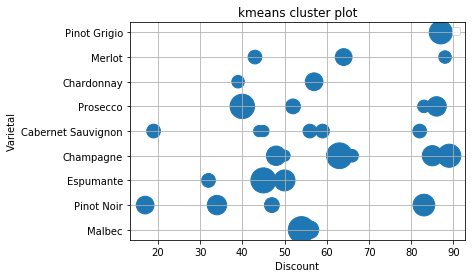

In [10]:
# plot clusters
#setup
item1 = offers.Discount
item2 = offers.Varietal
item3 = offers.Qty_min_kg
item4 = offers.Campaign
item5 = offers.Origin
item6 = offers.PastPeak

xitem = item1
yitem = item2

# dressing
plt.grid()
plt.legend(loc="best")
plt.title('kmeans cluster plot')
plt.xlabel(xitem.name)
plt.ylabel(yitem.name)

# plot/chart type
plt.scatter(xitem, yitem, label=xitem.name, marker='o', s=offers.counts*10*np.pi)  # need to improve the type test

# display plot
# plt.figure()
plt.show()

/Users/dan/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/dan/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


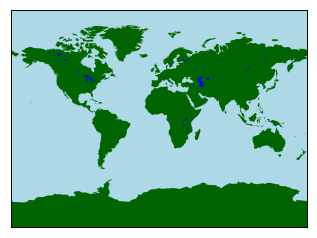

In [11]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime
# miller projection
map = Basemap(projection='mill',lon_0=0)
# plot coastlines, draw label meridians and parallels.
# map.drawcoastlines()
# map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
# map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='darkgreen',lake_color='blue')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
# date = datetime.utcnow()
# CS=map.nightshade(date)
# plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()

In [5]:
def viewPurchaseLabels(self, format=1):
    '''removes decimal places in df table'''
    util_data.setDF(w=None, c=None, r=None, f='{:,.0f}')
    if format==1  : return self.purchase_labels.replace('0','-')
    elif format==2: return self.purchase_labels.sort_values(by=[0,1,2,3], ascending=False).replace('0','-')
def fitSilhouette(self):
    ''' k means clustering - cluster "sensitivity" analysis '''
    # number of clusters to test (e.g. 2 to # of features)
    self.n_clusters = {}
    for n_cluster in range(2, len(self.features) + 1):
        self.clf                    = KMeans(n_clusters=n_cluster)
        self.cluster_labels         = self.clf.fit_predict(self.offer_log)
        self.silhouette_avg         = silhouette_score(self.offer_log, self.clf.labels_)
        self.n_clusters[n_cluster]  = self.silhouette_avg
        logger.info("For n_clusters = {0} the average silhoette_score is: {1:,.3f}".format(self.clf.n_clusters, self.silhouette_avg))
    max_value = max(self.n_clusters, key=lambda key: self.n_clusters[key])
    logger.info("{0} clusters produces the highest average silhouette value: {1:,.3f}".format(max_value, self.n_clusters[max_value]))
def fitNscore(self, params):
    ''' k means clustering '''
    self.clf                = KMeans(
        n_clusters              = params.get('n_clusters', 8),         # number of clusters/centroids
        init                    = params.get('init', 'k-means++'),    # setup initial cluster centers in "smart way"
        n_init                  = params.get('n_init', 10),           # of times algo run with diff centriod seeds
        max_iter                = params.get('max_iter', 300),           # max iterations for a single run
        tol                     = params.get('tol', 0.0001),          # relative tolerance regarding inertia to declare convergence
        precompute_distances    = params.get('precompute_distances', 'auto'),# faster, but takes more memory, auto sets a threshold
        verbose                 = params.get('verbose', 0),
        random_state            = params.get('random_state', None),   # generator to initialize centers
        copy_x                  = params.get('copy_x', True),         # if false, data is centered first
        n_jobs                  = params.get('n_jobs', 1),            # if -1 all cpu's are used
        algorithm               = params.get('algorithm', 'auto'))
    self.cluster_distance       = self.clf.fit_transform(self.offer_log)      # transform X to 'new space' (i.e. cluster distance)
    # self.fit                    = self.clf.fit(self.offer_log)      # predict is redundant without new data
    # self.transform              = self.clf.transform(self.offer_log)    # X transformed to new space
    self.purchases.insert(self.purchases.shape[1], 'label', self.clf.labels_) # append as rightmost column
    self.purchase_labels        = self.purchases.pivot_table(values='purchases', index=['Cust_ln'], columns=['label'], aggfunc='sum', fill_value='0')
    self.opt_cluster_centers    = util_data.pd.DataFrame(self.clf.cluster_centers_.T)    # transform with features as index
    self.sample_silhouette_values = silhouette_samples(self.offer_log, self.clf.labels_)
    # self.opt_cluster_centers    = util_data.np.around(util_data.np.absolute(self.opt_cluster_centers),1)
    self.purchases.insert(0, 'sil'+str(self.clf.n_clusters), self.sample_silhouette_values)    # prepend column
    # self.offers                 = self.sample_silhouette_values.join(self.offers, how='outer')# Coordinates of cluster centers (n_clusters, n_features)
    self.offers                 = self.opt_cluster_centers.join(self.offers, how='outer')# Coordinates of cluster centers (n_clusters, n_features)
    # self.predict                = self.clf.predict(self.offer_log)  # compute cluster indexes for each sample (100 samples, 7 features)
    # self.score                  = self.clf.score(self.offer_log)  # score is redundant without new data
def plotClusters(self):
    ''' plot clusters '''
    title   = 'kmeans cluster plot'
    xlabel  = 'dunno yet'
    ylabel  = 'dunno yet'
    util_plot.plotData(self.clf.transform() )
